# Analyzing Time Series Data with Socrata and Python

In [1]:
import os
os.getcwd()

'c:\\Users\\jessi\\OneDrive\\Desktop\\2024\\te440project'

## Loading datasets into our notebook

We'll start by loading a city of Chicago permits dataset into a Pandas DataFrame. We'll use the open source sodapy Python Socrata module to do this.

In [2]:
import pandas as pd
from sodapy import Socrata

# load Chicago permits data
chicago_permits_df = pd.read_csv(r'Building_Permits.csv')

C:\Users\jessi\AppData\Local\Temp\ipykernel_12640\2591492244.py:5: DtypeWarning: Columns (0,1,12,34,39,44,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_permits_df = pd.read_csv(r'Building_Permits.csv')


In [5]:
import pandas as pd
from sodapy import Socrata

# load Chicago permits data
chicago_permits_df = pd.read_csv(r'Building_Permits.csv')

C:\Users\jessi\AppData\Local\Temp\ipykernel_13888\2591492244.py:5: DtypeWarning: Columns (0,1,12,34,39,44,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_permits_df = pd.read_csv(r'Building_Permits.csv')


In the next few cells we'll do some exploration of our datasets using the `len`, `head`, and `value_counts` functions. We'll start by getting a sense of how many rows are in each of our datasets with the `len` function.

Now let's see have a peek at the first 10 rows in each of those dataset using the `head` method. You can optionally pass a parameter for the number of rows you want to print if 5 isn't enough.

In [3]:
print(len(chicago_permits_df))
chicago_permits_df.head(10)

787617


,ID,PERMIT#,PERMIT_STATUS,PERMIT_MILESTONE,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,...,REPORTED_COST,PIN_LIST,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION
0,2702289,100620286,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,10/23/2015,10/23/2015,0.0,9586.0,...,35000.0,2607103071,NaN,NaN,NaN,1.195183e+06,1.841903e+06,NaN,NaN,NaN
1,2706282,100622550,NaN,NaN,PERMIT - ELEVATOR EQUIPMENT,CONVEYANCE DEVICE PERMIT,11/05/2015,11/05/2015,0.0,150.0,...,666058.0,1709326001,28.0,2801.0,42.0,NaN,NaN,NaN,NaN,NaN
2,2713781,100626588,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,12/07/2015,12/07/2015,0.0,2231.0,...,4000.0,1431106016,22.0,221600.0,32.0,1.160967e+06,1.915314e+06,NaN,NaN,NaN
3,2716840,100628184,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,12/17/2015,12/17/2015,0.0,6437.0,...,12000.0,2023102007,42.0,420800.0,20.0,NaN,NaN,NaN,NaN,NaN
4,2708080,100623607,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,11/12/2015,11/17/2015,5.0,2500.0,...,13000.0,1728236003,35.0,350400.0,3.0,NaN,NaN,NaN,NaN,NaN
5,2741899,100641877,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,03/28/2016,04/01/2016,4.0,6821.0,...,49912.0,2024314004,43.0,430200.0,5.0,1.190093e+06,1.860027e+06,NaN,NaN,NaN
6,2759311,100652453,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,05/27/2016,05/31/2016,4.0,328.0,...,4440.0,2521204019,49.0,491300.0,34.0,1.175968e+06,1.830694e+06,NaN,NaN,NaN
7,2982615,100787475,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,10/10/2018,10/10/2018,0.0,6700.0,...,0.0,NaN,42.0,421200.0,20.0,NaN,NaN,NaN,NaN,NaN
8,1668901,100106114,NaN,NaN,PERMIT - SIGNS,SIGN PERMIT,04/06/2006,04/06/2006,0.0,6359.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3170997,100910640,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,02/26/2021,03/11/2021,13.0,1712.0,...,0.0,NaN,25.0,250300.0,37.0,1.139761e+06,1.910924e+06,NaN,NaN,NaN


Printing our dataframes like this gives us a sense of what columns exist, and quick sense of some of the values in the dataset. But there's an even better way to detrmine the top values for a particular column -- the `value_counts` method.

In [4]:
chicago_permits_df["APPLICATION_START_DATE"].value_counts(dropna=False).head(10)

APPLICATION_START_DATE
10/16/2007    366
NaN           348
05/25/2016    346
08/14/2019    341
03/07/2017    328
03/30/2011    321
03/13/2006    321
04/23/2012    321
09/22/2014    316
07/19/2006    315
Name: count, dtype: int64

## Select a subset of a DataFrame & Deal with missing values

In [5]:
chicago_permits_df.shape

(787617, 115)

In [6]:
chicago_permits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787617 entries, 0 to 787616
Columns: 115 entries, ID to LOCATION
dtypes: float64(27), object(88)
memory usage: 691.0+ MB


In [7]:
print(chicago_permits_df.isnull().sum())

ID                       0
PERMIT#                  0
PERMIT_STATUS       316097
PERMIT_MILESTONE    316097
PERMIT_TYPE              0
                     ...  
XCOORDINATE           1104
YCOORDINATE           1104
LATITUDE             12316
LONGITUDE            12316
LOCATION             12316
Length: 115, dtype: int64


There are too many columns to analysize and we probably do not care the information in all the columns. So let's only select part of the dataframe we care about. Please make your own decision of columns selection based on what you would like to observie.

In [8]:
chicago_permits_df.columns

Index(['ID', 'PERMIT#', 'PERMIT_STATUS', 'PERMIT_MILESTONE', 'PERMIT_TYPE',
       'REVIEW_TYPE', 'APPLICATION_START_DATE', 'ISSUE_DATE',
       'PROCESSING_TIME', 'STREET_NUMBER',
       ...
       'REPORTED_COST', 'PIN_LIST', 'COMMUNITY_AREA', 'CENSUS_TRACT', 'WARD',
       'XCOORDINATE', 'YCOORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object', length=115)

In [9]:
chicago_permits_df_sub = chicago_permits_df[['ID', 'PERMIT#', 'PERMIT_TYPE', 'REVIEW_TYPE', 'APPLICATION_START_DATE','STREET_DIRECTION','COMMUNITY_AREA','LATITUDE', 'LONGITUDE', 'LOCATION']]

In [10]:
chicago_permits_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787617 entries, 0 to 787616
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      787617 non-null  object 
 1   PERMIT#                 787617 non-null  object 
 2   PERMIT_TYPE             787617 non-null  object 
 3   REVIEW_TYPE             787609 non-null  object 
 4   APPLICATION_START_DATE  787269 non-null  object 
 5   STREET_DIRECTION        787561 non-null  object 
 6   COMMUNITY_AREA          712955 non-null  float64
 7   LATITUDE                775301 non-null  float64
 8   LONGITUDE               775301 non-null  float64
 9   LOCATION                775301 non-null  object 
dtypes: float64(3), object(7)
memory usage: 60.1+ MB


The value counts make it clear that a lot of the values in the "application_start_date" column are missing or null. There a variety of ways you can handle missing data, but removing incomplete rows is the simplest. In the next cell, we'll remove rows with null dates. There are also a lot of columns in the permits dataset that we won't use in this analysis. So we'll also filter down our dataset to just the columns we're interested in to reduce the amount of extraneous information.

In [11]:
chicago_permits_df_sub_notnull = chicago_permits_df_sub[chicago_permits_df_sub["APPLICATION_START_DATE"].notnull()]
chicago_permits_df_sub_notnull = chicago_permits_df_sub_notnull[["APPLICATION_START_DATE"]].reset_index(drop=True)
chicago_permits_df_sub_notnull.head(10)

,APPLICATION_START_DATE
0,10/23/2015
1,11/05/2015
2,12/07/2015
3,12/17/2015
4,11/12/2015
5,03/28/2016
6,05/27/2016
7,10/10/2018
8,04/06/2006
9,02/26/2021


## Print descriptive statistics

Use info() to get some basic summary about the dataframe, and also describe() helps us to get some descriptive statistics about columns containing the numeric values.

In [12]:
chicago_permits_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787617 entries, 0 to 787616
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      787617 non-null  object 
 1   PERMIT#                 787617 non-null  object 
 2   PERMIT_TYPE             787617 non-null  object 
 3   REVIEW_TYPE             787609 non-null  object 
 4   APPLICATION_START_DATE  787269 non-null  object 
 5   STREET_DIRECTION        787561 non-null  object 
 6   COMMUNITY_AREA          712955 non-null  float64
 7   LATITUDE                775301 non-null  float64
 8   LONGITUDE               775301 non-null  float64
 9   LOCATION                775301 non-null  object 
dtypes: float64(3), object(7)
memory usage: 60.1+ MB


In [13]:
chicago_permits_df_sub.describe()

,COMMUNITY_AREA,LATITUDE,LONGITUDE
count,712955.000000,775301.000000,775301.000000
mean,31.764874,41.869803,-87.673276
std,21.998359,0.096649,0.116189
min,0.000000,0.000000,-87.940225
25%,12.000000,41.802283,-87.707993
50%,28.000000,41.885861,-87.662959
75%,47.000000,41.931187,-87.632168
max,77.000000,42.022780,0.000000


### Milestone Part 1 <br>

Follow a similar procedure and use your chosen dataset from the final project to answer the following questions. Your result should be similar to the results shown on the code boxes.

### Q1

TODO 1:
 
1. Load the dataset that you chose for your final project and save it as a data frame.

2. Print the length of your data frame and the first 10 rows to understand the structure of your data.

3. Print the data types of each column to understand what kind of data is stored.

In [14]:
## TODO:Q1
Traffic_Crashes_Crashes_df = pd.read_csv(r'Traffic_Crashes_Crashes.csv')
Traffic_Crashes_People_df = pd.read_csv(r'Traffic_Crashes_People.csv')


C:\Users\jessi\AppData\Local\Temp\ipykernel_12640\1264360101.py:2: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  Traffic_Crashes_Crashes_df = pd.read_csv(r'Traffic_Crashes_Crashes.csv')
C:\Users\jessi\AppData\Local\Temp\ipykernel_12640\1264360101.py:3: DtypeWarning: Columns (19,23,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  Traffic_Crashes_People_df = pd.read_csv(r'Traffic_Crashes_People.csv')


In [15]:
Traffic_Crashes_Crashes=Traffic_Crashes_Crashes_df[['CRASH_RECORD_ID','CRASH_DATE','POSTED_SPEED_LIMIT','TRAFFIC_CONTROL_DEVICE','WEATHER_CONDITION','LIGHTING_CONDITION','LATITUDE','LONGITUDE']]
print(len(Traffic_Crashes_Crashes))
print(Traffic_Crashes_Crashes.info())
Traffic_Crashes_Crashes.head(10)

885133
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885133 entries, 0 to 885132
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CRASH_RECORD_ID         885133 non-null  object 
 1   CRASH_DATE              885133 non-null  object 
 2   POSTED_SPEED_LIMIT      885133 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE  885133 non-null  object 
 4   WEATHER_CONDITION       885133 non-null  object 
 5   LIGHTING_CONDITION      885133 non-null  object 
 6   LATITUDE                878801 non-null  float64
 7   LONGITUDE               878801 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 54.0+ MB
None


,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,LATITUDE,LONGITUDE
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,CLEAR,DUSK,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,41.85412,-87.665902
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,08/09/2023 11:00:00 PM,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,CLEAR,DAYLIGHT,NaN,NaN
5,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,11/26/2019 08:38:00 AM,25,NO CONTROLS,CLEAR,DAYLIGHT,NaN,NaN
6,35156ce97cab22747495e92e8bbb16c57e0e60dc3ce6d1...,02/06/2023 05:30:00 PM,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NaN,NaN
7,359bf9f5872d646bb63576e55b1e0b480dc93c2b935ab5...,01/31/2022 07:45:00 PM,25,NO CONTROLS,CLEAR,DARKNESS,NaN,NaN
8,36360857c079418cba1b1d70cf653595bbfb4566de8fcb...,01/01/2022 04:32:00 PM,10,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",NaN,NaN
9,37a215843a67b9d2118972242e0ab68232583ffe20401f...,10/18/2020 03:58:00 PM,35,NO CONTROLS,RAIN,DAYLIGHT,NaN,NaN


In [16]:
Traffic_Crashes_People=Traffic_Crashes_People_df[['CRASH_RECORD_ID','PERSON_ID','PERSON_TYPE','SEX','AGE','CELL_PHONE_USE','INJURY_CLASSIFICATION','DRIVER_ACTION','PEDPEDAL_ACTION']]
print(len(Traffic_Crashes_People))
print(Traffic_Crashes_People.info())
Traffic_Crashes_People.head(10)

1944033
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944033 entries, 0 to 1944032
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   CRASH_RECORD_ID        object 
 1   PERSON_ID              object 
 2   PERSON_TYPE            object 
 3   SEX                    object 
 4   AGE                    float64
 5   CELL_PHONE_USE         object 
 6   INJURY_CLASSIFICATION  object 
 7   DRIVER_ACTION          object 
 8   PEDPEDAL_ACTION        object 
dtypes: float64(1), object(8)
memory usage: 133.5+ MB
None


,CRASH_RECORD_ID,PERSON_ID,PERSON_TYPE,SEX,AGE,CELL_PHONE_USE,INJURY_CLASSIFICATION,DRIVER_ACTION,PEDPEDAL_ACTION
0,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,O749947,DRIVER,M,25.0,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN
1,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,O871921,DRIVER,M,37.0,NaN,NO INDICATION OF INJURY,NONE,NaN
2,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,O10018,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,IMPROPER BACKING,NaN
3,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,O10038,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN
4,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,O10039,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN
5,dd1bce4bd6d0be4c247714dcabab44e6563c62b913229b...,O10041,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN
6,4bd2ee6bb306902b99a9c2ae55cf4fcffec00879e39759...,O10062,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN
7,9c03b6fcc6d72cf3ee2cb9ea754ea7e4617ab965142552...,O10066,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN
8,2e7e0c1682100a200a46c25a532eda4febb00a2ae49ea9...,O1007,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN
9,8bf8069b3d839b732fd35d2c9d8caddeddbb4b8978e84d...,O10088,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN


### Q2
You can learn other methods to deal with missing values here: https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

Answer the following questions:

2.1 Handle missing values. What variables have missing values? What types/forms of missing values are they? (e.g blank, NA, N/A, -, etc.). After dealing with missing values, show the dimensions of the data.

2.2 Please briefly describe how you deal will with these missing values and justify why you chose these methods (Hint: common imputation methods include impute by mean/median/mode, keep and ignore the NAs, drop the observations with NAs). 

2.3 Identify and remove any duplicate records in the dataset. Then, eliminate any invalid or extreme outliers or values and explain how you identified and handled theme. Provide the total number of rows before and after these changes and print the first 10 rows of the cleaned dataset.

2.4 Generate summary statistics for your cleaned data (e.g., mean, median, standard deviation, sum, etc.). Compare these statistics to the ones from the raw dataset, and discuss how the data cleaning process affected the results. 

2.5 What were the major data cleaning tasks you performed? Provide statistics that show how the data was cleaned (e.g., missing values handled, duplicates removed, outliers dealt with). Summarize your findings from the cleaned data and highlight any notable changes or insights you gained from the data cleaning process. 


In [18]:
## TODO: Q2 
## 2.1-2: Variables that can have missing values: SEX(X), AGE(NaN), CELL_PHONE_USE(NaN), I will deal with missing values by keeping and ignoring the NAs because I want to focus on the location
## of the most pedestrian collisions. But I will combine the two datasets together so that crashes that don't have pedestrians involved are dropped. 
merged_df = pd.merge(Traffic_Crashes_People, Traffic_Crashes_Crashes, on='CRASH_RECORD_ID', how='inner') 
print(len(merged_df))
print(merged_df.info())
merged_df.head(10)

1944033
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944033 entries, 0 to 1944032
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   CRASH_RECORD_ID         object 
 1   PERSON_ID               object 
 2   PERSON_TYPE             object 
 3   SEX                     object 
 4   AGE                     float64
 5   CELL_PHONE_USE          object 
 6   INJURY_CLASSIFICATION   object 
 7   DRIVER_ACTION           object 
 8   PEDPEDAL_ACTION         object 
 9   CRASH_DATE              object 
 10  POSTED_SPEED_LIMIT      int64  
 11  TRAFFIC_CONTROL_DEVICE  object 
 12  WEATHER_CONDITION       object 
 13  LIGHTING_CONDITION      object 
 14  LATITUDE                float64
 15  LONGITUDE               float64
dtypes: float64(3), int64(1), object(12)
memory usage: 237.3+ MB
None


,CRASH_RECORD_ID,PERSON_ID,PERSON_TYPE,SEX,AGE,CELL_PHONE_USE,INJURY_CLASSIFICATION,DRIVER_ACTION,PEDPEDAL_ACTION,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,LATITUDE,LONGITUDE
0,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,O749947,DRIVER,M,25.0,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,09/28/2019 03:30:00 AM,30,NO CONTROLS,RAIN,DARKNESS,41.900043,-87.755577
1,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,O871921,DRIVER,M,37.0,NaN,NO INDICATION OF INJURY,NONE,NaN,04/13/2020 10:50:00 PM,30,FLASHING CONTROL SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",41.736044,-87.653404
2,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,O10018,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,IMPROPER BACKING,NaN,11/01/2015 05:00:00 AM,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",41.808173,-87.708484
3,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,O10038,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 08:00:00 AM,35,NO CONTROLS,UNKNOWN,UNKNOWN,41.981425,-87.659861
4,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,O10039,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 10:15:00 AM,10,NO CONTROLS,CLEAR,DAYLIGHT,41.809489,-87.606417
5,dd1bce4bd6d0be4c247714dcabab44e6563c62b913229b...,O10041,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 11:00:00 AM,25,NO CONTROLS,CLEAR,UNKNOWN,41.733235,-87.654625
6,4bd2ee6bb306902b99a9c2ae55cf4fcffec00879e39759...,O10062,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 12:30:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,41.869592,-87.730334
7,9c03b6fcc6d72cf3ee2cb9ea754ea7e4617ab965142552...,O10066,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,10/31/2015 04:00:00 PM,15,NO CONTROLS,RAIN,DAWN,41.909765,-87.743376
8,2e7e0c1682100a200a46c25a532eda4febb00a2ae49ea9...,O1007,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,09/02/2015 02:35:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,41.896163,-87.640189
9,8bf8069b3d839b732fd35d2c9d8caddeddbb4b8978e84d...,O10088,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 01:00:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,41.985541,-87.700597


In [21]:
## TODO: Q2 
## 2.3: I will remove duplicate crash_ids and for outliers speed limit above 50 as I want to focus on pedestrian traveled roads in Chicago and not highways. Before is 1944033 rows, after is 867608 rows
filtered_df = merged_df[merged_df['POSTED_SPEED_LIMIT'] < 40]
filtered_df = filtered_df.drop_duplicates(subset='CRASH_RECORD_ID')
print(len(filtered_df))
filtered_df.head(10)

867608


,CRASH_RECORD_ID,PERSON_ID,PERSON_TYPE,SEX,AGE,CELL_PHONE_USE,INJURY_CLASSIFICATION,DRIVER_ACTION,PEDPEDAL_ACTION,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,LATITUDE,LONGITUDE
0,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,O749947,DRIVER,M,25.0,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,09/28/2019 03:30:00 AM,30,NO CONTROLS,RAIN,DARKNESS,41.900043,-87.755577
1,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,O871921,DRIVER,M,37.0,NaN,NO INDICATION OF INJURY,NONE,NaN,04/13/2020 10:50:00 PM,30,FLASHING CONTROL SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",41.736044,-87.653404
2,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,O10018,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,IMPROPER BACKING,NaN,11/01/2015 05:00:00 AM,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",41.808173,-87.708484
3,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,O10038,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 08:00:00 AM,35,NO CONTROLS,UNKNOWN,UNKNOWN,41.981425,-87.659861
4,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,O10039,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 10:15:00 AM,10,NO CONTROLS,CLEAR,DAYLIGHT,41.809489,-87.606417
5,dd1bce4bd6d0be4c247714dcabab44e6563c62b913229b...,O10041,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 11:00:00 AM,25,NO CONTROLS,CLEAR,UNKNOWN,41.733235,-87.654625
6,4bd2ee6bb306902b99a9c2ae55cf4fcffec00879e39759...,O10062,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 12:30:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,41.869592,-87.730334
7,9c03b6fcc6d72cf3ee2cb9ea754ea7e4617ab965142552...,O10066,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,10/31/2015 04:00:00 PM,15,NO CONTROLS,RAIN,DAWN,41.909765,-87.743376
8,2e7e0c1682100a200a46c25a532eda4febb00a2ae49ea9...,O1007,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,09/02/2015 02:35:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,41.896163,-87.640189
9,8bf8069b3d839b732fd35d2c9d8caddeddbb4b8978e84d...,O10088,DRIVER,X,NaN,NaN,NO INDICATION OF INJURY,UNKNOWN,NaN,11/01/2015 01:00:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,41.985541,-87.700597


In [23]:
## 2.4 Generate summary statistics for your cleaned data. Compare these statistics to the ones from the raw dataset, and discuss how the data cleaning process affected the results. 
## 2.5 What were the major data cleaning tasks you performed? Summarize your findings from the cleaned data and highlight any notable changes or insights you gained from the data cleaning process. 
## I will look at the average of the latitude and longitude to find midpoint of all the crashes
Faverage_latitude = filtered_df['LATITUDE'].mean()
Faverage_longitude = filtered_df['LONGITUDE'].mean()
average_latitude = merged_df['LATITUDE'].mean()
average_longitude = merged_df['LONGITUDE'].mean()
print("Average Latitude Non-Filtered:", average_latitude)
print("Average Longitude Non-Filtered:", average_longitude)
print("Average Latitude Filtered:", Faverage_latitude)
print("Average Longitude Filtered:", Faverage_longitude)
## The average longitude and latitude changed which means the locations/clusters of pedestrian and collisions is different for speeds below 40. 
## I removed duplicates and delt with speed outliers to focus more on areas of commuting(walking) which will have speeds less than 40. 

Average Latitude Non-Filtered: 41.853551337935606
Average Longitude Non-Filtered: -87.67150001919325
Average Latitude Filtered: 41.85498043223942
Average Longitude Filtered: -87.67492790690451


## Aggregating based on date

For the purpose of analysizing APPLICATION_START_DATE distribution (feel free to explore other variables), in the dataframe "chicago_permits_df_sub_notnull", each row in our dataset corresponds to a permit application and the only column we've preserved is the date of the application. The task of forecasting number of permit applications is not really interesting (or reliable) at the granularity of day. Predicting at the granularity of week might be interesting, but let's start by grouping by month. To get some datatime functionality from Python, we'll convert our date column to a datetime type.

In [ ]:
import datetime

fixed_dates_df = chicago_permits_df_sub_notnull.copy()
fixed_dates_df["APPLICATION_START_DATE"] = fixed_dates_df["APPLICATION_START_DATE"].apply(pd.to_datetime)
fixed_dates_df = fixed_dates_df.set_index(fixed_dates_df["APPLICATION_START_DATE"])
grouped = fixed_dates_df.resample("M").count()
data_df = pd.DataFrame({"count": grouped.values.flatten()}, index=grouped.index)
data_df.head(10)

## Plotting a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000109973ACF70>,
      dtype=object)

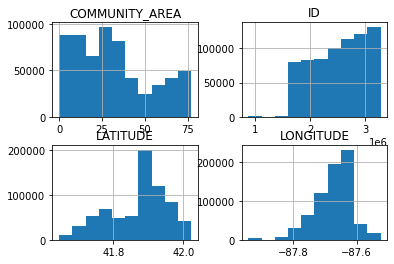

In [17]:
chicago_permits_df_sub.hist()

## Plotting a time series

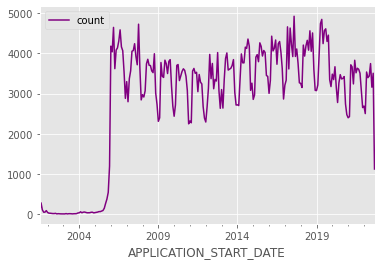

In [18]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

data_df.plot(color="purple")

Notice how the number of applications in 2005 and before looks suspiciously low. My intuition is that this is a data problem. Let's remove all data from before 2006, since bad data will impact the accuracy of our model. Let's also remove data from before October of this year, since October is incomplete.

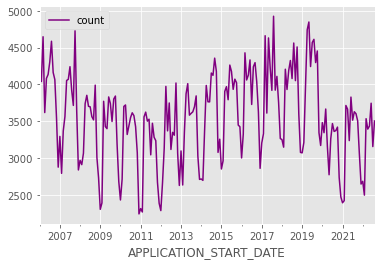

In [22]:
def is_between_2006_and_now(date):
    return date > datetime.datetime(2006, 1, 1) and date < datetime.datetime(2022, 9, 1)
#Please update the date range

data_df = data_df[data_df.index.to_series().apply(is_between_2006_and_now)]
data_df.plot(color="purple")

This plot makes two things pretty clear. First, there are some clear trends in the time series -- for example, an increase between 2011 and 2017, followed by a levelling off of permit applications. Second, there is a cyclic nature to the time series, which is indicative of there being seasonal variation in permit applications (which isn't surprising).

### Q3

Using your own dataset, create two different visualizations to analyze the data, using Python and any plotting library of your choice (e.g., Matplotlib, Seaborn, Plotly). For each dataset, spend some time observing the visualizations, and identify any significant patterns or trends you found. Describe the insights or trends revealed, and discuss how these findings can help address the research question you identified.

In [23]:
## TODO : Q3
